<a href="https://colab.research.google.com/github/manoj-mathivanan/pythonML/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing yfinance
import yfinance as yf
#Collecting data
data_raw = yf.download('AMZN',period='5y',interval='1d')
data_raw.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2019-12-02 00:00:00+00:00,89.080002,89.080002,90.277496,88.134003,90.220001,78512000
2019-12-03 00:00:00+00:00,88.498001,88.498001,88.643501,87.361504,88.000000,67618000
2019-12-04 00:00:00+00:00,88.034500,88.034500,89.454498,88.011002,88.700500,53402000
2019-12-05 00:00:00+00:00,87.024002,87.024002,88.175003,87.000000,88.175003,56476000
2019-12-06 00:00:00+00:00,87.580002,87.580002,87.720001,87.006500,87.559998,62348000


In [ ]:
data_raw.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2024-11-22 00:00:00+00:00,197.119995,197.119995,199.259995,196.750000,198.250000,31530800
2024-11-25 00:00:00+00:00,201.449997,201.449997,201.949997,199.000000,199.279999,40685700
2024-11-26 00:00:00+00:00,207.860001,207.860001,208.000000,201.789993,201.899994,41673700
2024-11-27 00:00:00+00:00,205.740005,205.740005,207.639999,205.050003,206.979996,28061600
2024-11-29 00:00:00+00:00,207.889999,207.889999,208.199997,204.589996,205.830002,24892400


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn



In [ ]:
# Extract Date (index) and Close values into a new DataFrame
data = data_raw[['Close']].copy()
data.reset_index(inplace=True)
data.rename(columns={'index': 'Date'}, inplace=True)

# Display the new DataFrame
print(data)

Price                       Date       Close
Ticker                                  AMZN
0      2019-12-02 00:00:00+00:00   89.080002
1      2019-12-03 00:00:00+00:00   88.498001
2      2019-12-04 00:00:00+00:00   88.034500
3      2019-12-05 00:00:00+00:00   87.024002
4      2019-12-06 00:00:00+00:00   87.580002
...                          ...         ...
1253   2024-11-22 00:00:00+00:00  197.119995
1254   2024-11-25 00:00:00+00:00  201.449997
1255   2024-11-26 00:00:00+00:00  207.860001
1256   2024-11-27 00:00:00+00:00  205.740005
1257   2024-11-29 00:00:00+00:00  207.889999

[1258 rows x 2 columns]


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

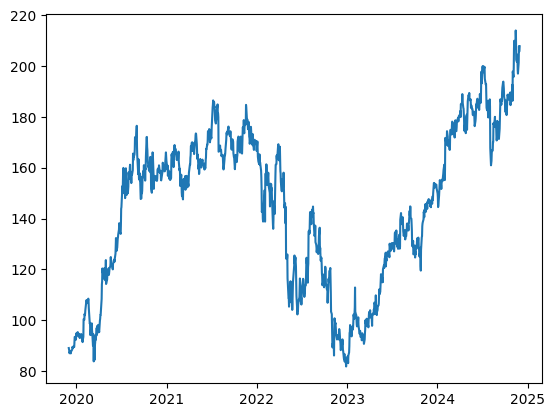

In [ ]:
# Make the data column pandas date type
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

Price,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Ticker,AMZN,,,,,,,
Date,,,,,,,,
2019-12-11 00:00:00+00:00,87.435997,86.960503,87.475502,87.580002,87.024002,88.034500,88.498001,89.080002
2019-12-12 00:00:00+00:00,88.016502,87.435997,86.960503,87.475502,87.580002,87.024002,88.034500,88.498001
2019-12-13 00:00:00+00:00,88.046997,88.016502,87.435997,86.960503,87.475502,87.580002,87.024002,88.034500
2019-12-16 00:00:00+00:00,88.460503,88.046997,88.016502,87.435997,86.960503,87.475502,87.580002,87.024002
2019-12-17 00:00:00+00:00,89.532997,88.460503,88.046997,88.016502,87.435997,86.960503,87.475502,87.580002
...,...,...,...,...,...,...,...,...
2024-11-22 00:00:00+00:00,197.119995,198.380005,202.880005,204.610001,201.699997,202.610001,211.479996,214.100006
2024-11-25 00:00:00+00:00,201.449997,197.119995,198.380005,202.880005,204.610001,201.699997,202.610001,211.479996


In [ ]:
# Make this numpy
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 87.43599701,  86.96050262,  87.47550201, ...,  88.03450012,
         88.4980011 ,  89.08000183],
       [ 88.01650238,  87.43599701,  86.96050262, ...,  87.02400208,
         88.03450012,  88.4980011 ],
       [ 88.04699707,  88.01650238,  87.43599701, ...,  87.58000183,
         87.02400208,  88.03450012],
       ...,
       [207.86000061, 201.44999695, 197.11999512, ..., 204.61000061,
        201.69999695, 202.61000061],
       [205.74000549, 207.86000061, 201.44999695, ..., 202.88000488,
        204.61000061, 201.69999695],
       [207.88999939, 205.74000549, 207.86000061, ..., 198.38000488,
        202.88000488, 204.61000061]])

In [ ]:
shifted_df_as_np.shape

(1251, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.91508925, -0.92227846, -0.91449196, ..., -0.90604022,
        -0.89903234, -0.89023281],
       [-0.90631233, -0.91508925, -0.92227846, ..., -0.92131838,
        -0.90604022, -0.89903234],
       [-0.90585127, -0.90631233, -0.91508925, ..., -0.91291198,
        -0.92131838, -0.90604022],
       ...,
       [ 0.90565459,  0.80873891,  0.74327169, ...,  0.8565164 ,
         0.81251877,  0.82627752],
       [ 0.87360145,  0.90565459,  0.80873891, ...,  0.83035983,
         0.8565164 ,  0.81251877],
       [ 0.90610816,  0.87360145,  0.90565459, ...,  0.76232234,
         0.83035983,  0.8565164 ]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((1251, 7), (1251,))

In [ ]:
# Flipping to make t-7 first
X = dc(np.flip(X, axis=1))
X

array([[-0.89023281, -0.89903234, -0.90604022, ..., -0.91291198,
        -0.91449196, -0.92227846],
       [-0.89903234, -0.90604022, -0.92131838, ..., -0.91449196,
        -0.92227846, -0.91508925],
       [-0.90604022, -0.92131838, -0.91291198, ..., -0.92227846,
        -0.91508925, -0.90631233],
       ...,
       [ 0.82627752,  0.81251877,  0.8565164 , ...,  0.76232234,
         0.74327169,  0.80873891],
       [ 0.81251877,  0.8565164 ,  0.83035983, ...,  0.74327169,
         0.80873891,  0.90565459],
       [ 0.8565164 ,  0.83035983,  0.76232234, ...,  0.80873891,
         0.90565459,  0.87360145]])

In [ ]:
split_index = int(len(X) * 0.95)

split_index

1188

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1188, 7), (63, 7), (1188,), (63,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1188, 7, 1), (63, 7, 1), (1188, 1), (63, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1188, 7, 1]),
 torch.Size([63, 7, 1]),
 torch.Size([1188, 1]),
 torch.Size([63, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        # Replace LSTM with RNN
        self.rnn = nn.RNN(input_size, hidden_size, num_stacked_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.rnn(x, h0)  # Note the change here: RNN only needs h0
        out = self.fc(out[:, -1, :])
        return out

# Example usage
model_rnn = RNN(1, 4, 1)
model_rnn.to(device)


RNN(
  (rnn): RNN(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model_rnn.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model_rnn(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model_rnn.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model_rnn(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1

Val Loss: 0.346
***************************************************

Epoch: 2

Val Loss: 0.423
***************************************************

Epoch: 3

Val Loss: 0.240
***************************************************

Epoch: 4

Val Loss: 0.011
***************************************************

Epoch: 5

Val Loss: 0.009
***************************************************

Epoch: 6

Val Loss: 0.009
***************************************************

Epoch: 7

Val Loss: 0.011
***************************************************

Epoch: 8

Val Loss: 0.012
***************************************************

Epoch: 9

Val Loss: 0.010
***************************************************

Epoch: 10

Val Loss: 0.011
***************************************************

Epoch: 11

Val Loss: 0.011
***************************************************

Epoch: 12

Val Loss: 0.011
***************************************************

Epoch: 13

Val Loss: 0.009
**********************

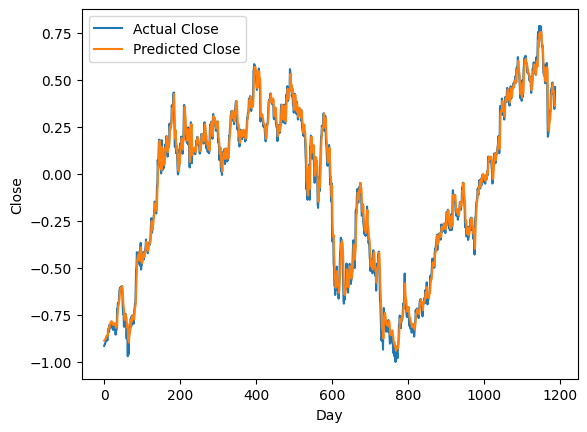

In [ ]:
with torch.no_grad():
    predicted_rnn = model_rnn(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted_rnn, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions_rnn = predicted_rnn.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions_rnn
dummies = scaler.inverse_transform(dummies)

train_predictions_rnn = dc(dummies[:, 0])
train_predictions_rnn

array([ 89.32305813,  89.42860008,  89.72374856, ..., 174.03958856,
       171.83191792, 172.33733426])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train_rnn = dc(dummies[:, 0])
new_y_train_rnn

array([ 87.435997  ,  88.0165014 ,  88.04699866, ..., 170.80000208,
       172.11999597, 178.49999962])

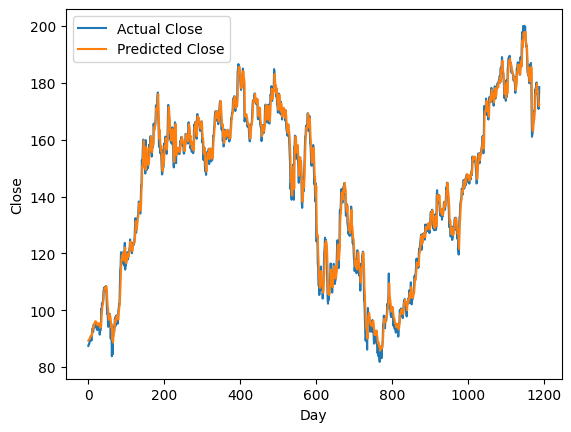

In [ ]:
plt.plot(new_y_train_rnn, label='Actual Close')
plt.plot(train_predictions_rnn, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions_rnn = model_rnn(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions_rnn
dummies = scaler.inverse_transform(dummies)

test_predictions_rnn = dc(dummies[:, 0])
test_predictions_rnn

array([177.02812655, 176.28749972, 174.30019108, 177.12755802,
       172.75951193, 175.17890709, 178.26585945, 182.84469378,
       185.46775748, 185.84733715, 184.79847751, 186.08732959,
       185.89187277, 188.51855151, 190.09170298, 192.21656072,
       192.58846483, 191.78133222, 190.63834739, 188.10793054,
       186.47291726, 185.17018451, 184.64876263, 182.42358249,
       185.40709411, 181.50393802, 182.60357386, 184.12766796,
       185.74890702, 187.5736924 , 187.05056353, 187.17635683,
       186.51277342, 186.944446  , 187.99670386, 188.28650665,
       188.84376754, 185.27750837, 186.00633209, 186.86407138,
       187.61065101, 189.47736618, 191.19334148, 186.96750817,
       194.759372  , 193.93449926, 197.29286775, 202.56797463,
       205.67691292, 205.0098288 , 204.17542764, 205.37979726,
       208.92416905, 207.7079845 , 201.82415852, 200.29872011,
       201.71298703, 200.74551912, 197.59005437, 196.17942615,
       198.82208677, 203.54512866, 202.90630259])

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test_rnn = dc(dummies[:, 0])
new_y_test_rnn

array([176.24999906, 173.33000104, 177.88999929, 171.38999942,
       175.39999447, 179.55000251, 184.52000476, 187.00000021,
       186.49000692, 184.89000082, 186.88000596, 186.42999402,
       189.86999471, 191.60000443, 193.88000552, 193.96000563,
       192.5299973 , 191.16000186, 187.97000299, 186.33000276,
       185.13000509, 184.75999326, 181.96000526, 186.50999413,
       180.8000037 , 182.72000037, 185.16999923, 186.6499953 ,
       188.82000759, 187.53999404, 187.69000065, 186.88999957,
       187.53000043, 188.99000535, 189.07000546, 189.69999694,
       184.71000551, 186.38000628, 187.83000182, 188.38999863,
       190.82999994, 192.7299956 , 186.39999349, 197.92999076,
       195.77999723, 199.50000027, 207.08999717, 210.05000115,
       208.1799942 , 206.83999535, 208.91000454, 214.1000061 ,
       211.47999765, 202.60999903, 201.69999731, 204.61000172,
       202.88000383, 198.38000664, 197.11999608, 201.4499955 ,
       207.86000165, 205.74000472, 207.88999824])

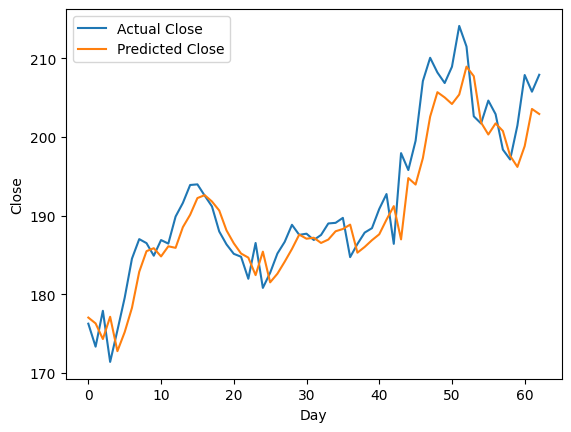

In [ ]:
plt.plot(new_y_test_rnn, label='Actual Close')
plt.plot(test_predictions_rnn, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


### LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 30
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
